In [110]:
from STDC import STDC
import sys
import pandas as pd
import graph_tool.all as gt
import numpy as np

In [111]:
#!{sys.executable} -m pip install pyarrow fastparquet

In [112]:
df = pd.read_parquet('data/df_checkpoint.parquet')

In [113]:
df.head()

,tweet_created_at,original_post_id,author_id,author_name,author_username,retweeter_id
0,2018-12-31 22:46:18,1079886497279561728,622354597,Salvo Di Grazia,MedBunker,951848540
1,2018-12-31 22:46:18,1079886497279561728,622354597,Salvo Di Grazia,MedBunker,135554444
2,2018-12-31 22:46:18,1079886497279561728,622354597,Salvo Di Grazia,MedBunker,433418060
3,2018-12-31 22:46:18,1079886497279561728,622354597,Salvo Di Grazia,MedBunker,1668533642
4,2018-12-31 22:46:18,1079886497279561728,622354597,Salvo Di Grazia,MedBunker,1623208790


In [114]:
df = df[(df['tweet_created_at'] >= '2018-01-01') & (df['tweet_created_at'] < '2018-07-01')]

In [115]:
stdc = STDC(df, timeframe = '%Y-%m',field_names=['author_id', 'retweeter_id', 'tweet_created_at'])

In [116]:
stdc.calculate_graphs()

{'2018-01': <Graph object, undirected, with 103 vertices and 4324 edges, 1 internal edge property, at 0x62ef29c70>,
 '2018-02': <Graph object, undirected, with 103 vertices and 4257 edges, 1 internal edge property, at 0x6f10fd630>,
 '2018-03': <Graph object, undirected, with 103 vertices and 4322 edges, 1 internal edge property, at 0x6f10fda90>,
 '2018-04': <Graph object, undirected, with 103 vertices and 4155 edges, 1 internal edge property, at 0x6f10fde50>,
 '2018-05': <Graph object, undirected, with 103 vertices and 4349 edges, 1 internal edge property, at 0x6f10fe210>,
 '2018-06': <Graph object, undirected, with 103 vertices and 4542 edges, 1 internal edge property, at 0x6f10fe5d0>}

In [117]:
stdc.calculate_communities()

{'2018-01': <VertexPropertyMap object with value type 'int64_t', for Graph 0x62ef29c70, at 0x4ae000440>,
 '2018-02': <VertexPropertyMap object with value type 'int64_t', for Graph 0x6f10fd630, at 0x4ae0009f0>,
 '2018-03': <VertexPropertyMap object with value type 'int64_t', for Graph 0x6f10fda90, at 0x4ae000600>,
 '2018-04': <VertexPropertyMap object with value type 'int64_t', for Graph 0x6f10fde50, at 0x4ae000a60>,
 '2018-05': <VertexPropertyMap object with value type 'int64_t', for Graph 0x6f10fe210, at 0x4ae000360>,
 '2018-06': <VertexPropertyMap object with value type 'int64_t', for Graph 0x6f10fe5d0, at 0x4ae0007c0>}

In [118]:
stdc.calculate_modularity()

,timeframe,modularity
0,2018-01,0.154273
1,2018-02,0.229570
2,2018-03,0.136383
3,2018-04,0.178383
4,2018-05,0.068403
5,2018-06,0.198931


In [119]:
stdc.calculate_aligned_modularity()

,t1,t2,modularity
0,2018-01,2018-02,0.191922
1,2018-02,2018-03,0.182977
2,2018-03,2018-04,0.157383
3,2018-04,2018-05,0.123393
4,2018-05,2018-06,0.133667


In [120]:
stdc.calculate_aligned_reduced_positions()

author_id                           5893702             6439122             \
author_id          t1      t2                                                
5893702            2018-01 2018-02            0.000000            0.960466   
                   2018-02 2018-03            0.000000            0.972028   
                   2018-03 2018-04            0.000000            0.960395   
                   2018-04 2018-05            0.000000            0.962067   
                   2018-05 2018-06            0.000000            0.982225   
...                                                ...                 ...   
936284727794860033 2018-01 2018-02            0.983925            0.999418   
                   2018-02 2018-03            0.979550            0.999346   
                   2018-03 2018-04            0.978458            0.999765   
                   2018-04 2018-05            0.979735            0.999459   
                   2018-05 2018-06            0.978742            0.998403   

author_id                           9095292             10228272            \
author_id          t1      t2                                                
5893702            2018-01 2018-02            0.965952            0.997610   
                   2018-02 2018-03            0.980143            0.998597   
                   2018-03 2018-04            0.981292            0.998910   
                   2018-04 2018-05            0.958143            0.999346   
                   2018-05 2018-06            0.963187            0.999257   
...                                                ...                 ...   
936284727794860033 2018-01 2018-02            0.971681            0.999996   
                   2018-02 2018-03            0.983236            0.999990   
                   2018-03 2018-04            0.996841            0.999888   
                   2018-04 2018-05            0.984409            0.999894   
                   2018-05 2018-06            0.976688            0.999874   

author_id                           13294452            13514762            \
author_id          t1      t2                                                
5893702            2018-01 2018-02            0.924518            0.974961   
                   2018-02 2018-03            0.916208            0.973967   
                   2018-03 2018-04            0.928906            0.979109   
                   2018-04 2018-05            0.936863            0.962460   
                   2018-05 2018-06            0.935060            0.928597   
...                                                ...                 ...   
936284727794860033 2018-01 2018-02            0.997504            0.997019   
                   2018-02 2018-03            0.995648            0.999285   
                   2018-03 2018-04            0.994309            0.999123   
                   2018-04 2018-05            0.992773            0.999350   
                   2018-05 2018-06            0.980280            0.999105   

author_id                           14060262            14932455            \
author_id          t1      t2                                                
5893702            2018-01 2018-02            0.682773            0.926692   
                   2018-02 2018-03            0.711395            0.963221   
                   2018-03 2018-04            0.739700            0.964357   
                   2018-04 2018-05            0.703388            0.932426   
                   2018-05 2018-06            0.655008            0.937806   
...                                                ...                 ...   
936284727794860033 2018-01 2018-02            0.978134            0.999659   
                   2018-02 2018-03            0.971725            0.999036   
                   2018-03 2018-04            0.971205            0.998068   
                   2018-04 2018-05            0.971877            0.997609   
                   

---

In [121]:
# Get the adjacency matrix as a numpy array
adj = gt.adjacency(stdc.graphs['2018-01'], weight = stdc.graphs['2018-01'].ep.weight).toarray()
print(adj)

[[0.         0.04668655 0.03663062 ... 0.00444826 0.01261614 0.0125781 ]
 [0.04668655 0.         0.         ... 0.         0.00500541 0.00016317]
 [0.03663062 0.         0.         ... 0.         0.00204152 0.02683519]
 ...
 [0.00444826 0.         0.         ... 0.         0.01197719 0.00601487]
 [0.01261614 0.00500541 0.00204152 ... 0.01197719 0.         0.0007421 ]
 [0.0125781  0.00016317 0.02683519 ... 0.00601487 0.0007421  0.        ]]


In [122]:
print(stdc.graphs['2018-01'])
print(stdc.graphs['2018-01'].vertex_properties['pos'])

<Graph object, undirected, with 103 vertices and 4324 edges, 1 internal edge property, at 0x62ef29c70>


KeyError: ('v', 'pos')

In [ ]:
print(stdc.graphs['2018-02'])
print(stdc.graphs['2018-02'].vertex_properties['pos'])

<Graph object, undirected, with 103 vertices and 4257 edges, 1 internal edge property, at 0x4c2910f50>


KeyError: ('v', 'pos')

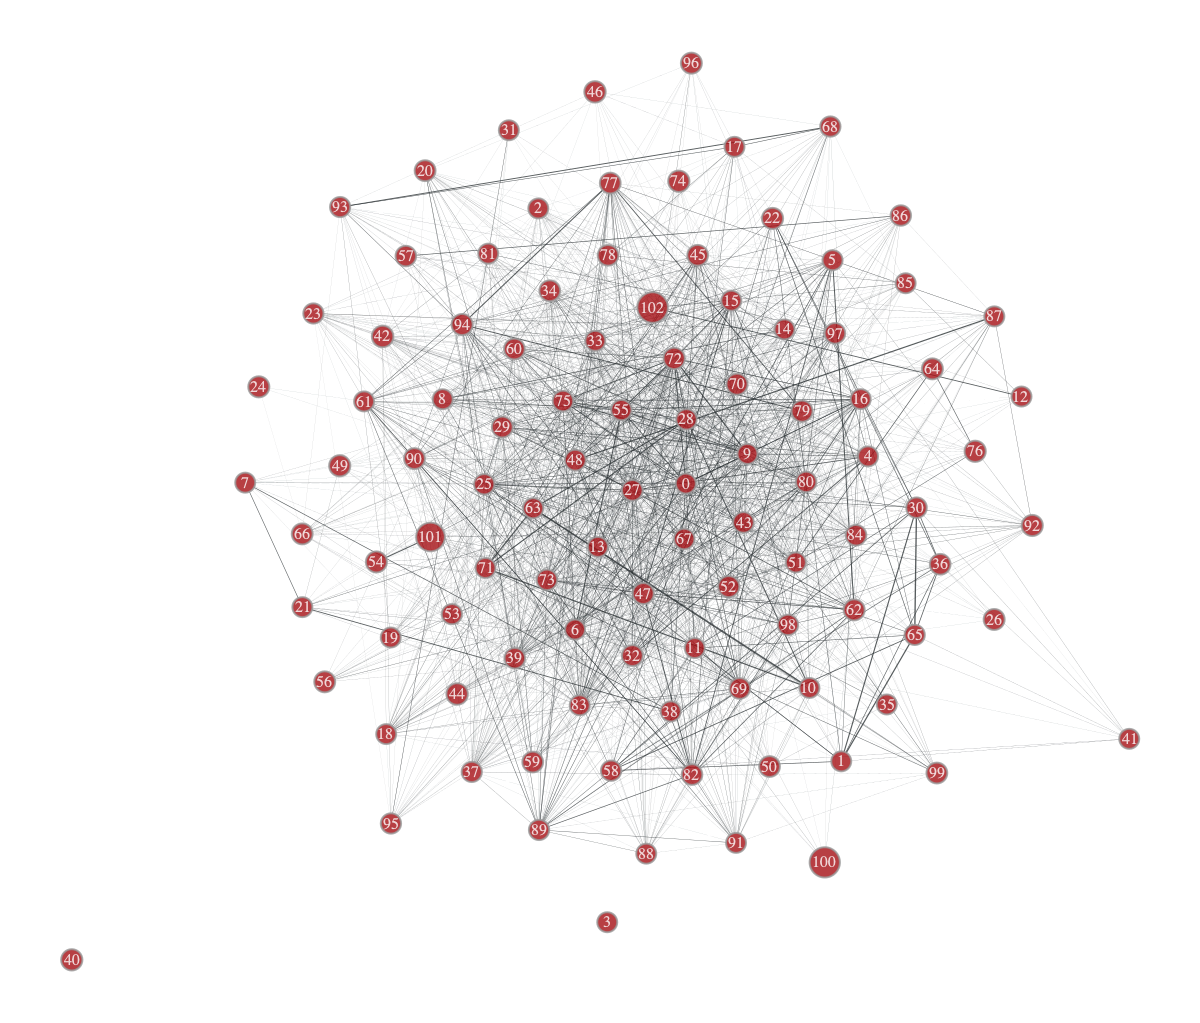

KeyError: ('v', 'pos')

In [ ]:
# create all graphs
for tf in stdc.graphs.keys():
    g = stdc.graphs[tf]

    gt.graph_draw(
        g,
        pos=g.vertex_properties['pos'],
        vertex_text=g.vertex_index,
        vertex_font_size=8,
        vertex_size=10,
        edge_pen_width=g.ep.weight
        )